# Project: Investigate a Dataset - [Heart_Dis_Data.csv]

## Table of Contents
<ul>
<li><a href="#Data Cleaning & preproccesing">Data Cleaning & preproccesing</a></li>
<li><a href="#EDA">Exploratory Data Analysis</a></li>
</ul>

In [229]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999
colors = sns.color_palette("Reds")   # define our color pallete


In [230]:
df = pd.read_csv("Heart_Dis_Data.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [231]:
df.shape

(319794, 18)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319794 entries, 0 to 319793
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319794 non-null  object 
 1   BMI               319794 non-null  float64
 2   Smoking           319794 non-null  object 
 3   AlcoholDrinking   319794 non-null  object 
 4   Stroke            319794 non-null  object 
 5   PhysicalHealth    319794 non-null  int64  
 6   MentalHealth      319794 non-null  int64  
 7   DiffWalking       319794 non-null  object 
 8   Sex               319794 non-null  object 
 9   AgeCategory       319794 non-null  object 
 10  Race              319794 non-null  object 
 11  Diabetic          319794 non-null  object 
 12  PhysicalActivity  319794 non-null  object 
 13  GenHealth         319794 non-null  object 
 14  SleepTime         319794 non-null  int64  
 15  Asthma            319794 non-null  object 
 16  KidneyDisease     31

## Data Cleaning & preproccesing

### - Check for duplicates

In [233]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

### - Check for duplicates

In [234]:
print(f"The number of duplicated values is : {df.duplicated().sum()}")

The number of duplicated values is : 18078


### - Drop  duplicates

In [235]:
df.drop_duplicates(inplace=True)
print(f"The number of duplicated values is : {df.duplicated().sum()}")

The number of duplicated values is : 0


### - Draw a box plot for all numerical values to detect outliers


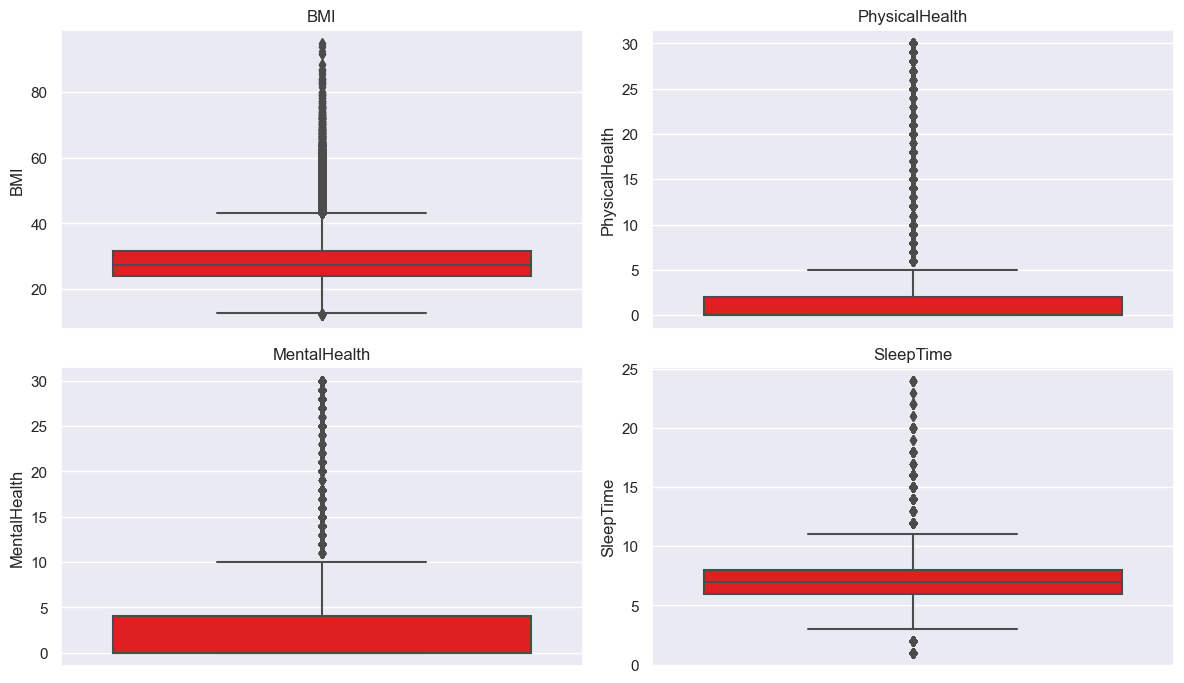

In [236]:
numeric_df = df.select_dtypes(include=['number'])
numerical_cols = numeric_df.columns
num_vars = len(numeric_df.columns)
num_cols = 2
num_rows = 2  

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 7))
axes = axes.flatten()

# Generate box plots
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i] , color = "Red")
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

### - Fix outliers issue for BMI
#### - After Google search we found that realistic BMI range: 10–60 kg/m²


In [237]:
df = df[(df["BMI"] >= 10) & (df["BMI"] <= 60)]

Text(0.5, 1.0, 'BMI')

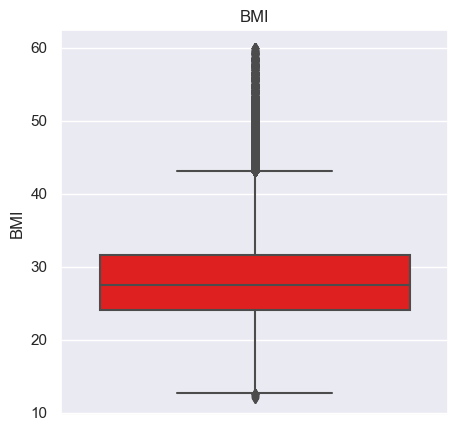

In [238]:
plt.figure(figsize=(5 , 5))
sns.boxplot(y=df["BMI"], color = "Red")
plt.title("BMI")

### - Fix outliers issue for Sleep time

In [239]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
Q1 = df["SleepTime"].quantile(0.25)
Q3 = df["SleepTime"].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df["SleepTime"] >= lower_bound) & (df["SleepTime"] <= upper_bound)]

Text(0.5, 1.0, 'Sleep time')

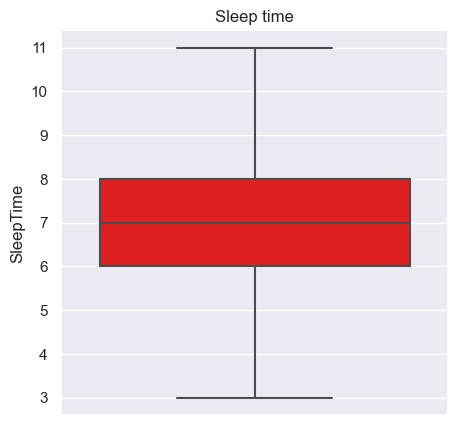

In [240]:
plt.figure(figsize=(5 , 5))
sns.boxplot(y=df["SleepTime"], color = "Red")
plt.title("Sleep time")

### - Physical health & Mental health

Text(0.5, 1.0, 'Mental health')

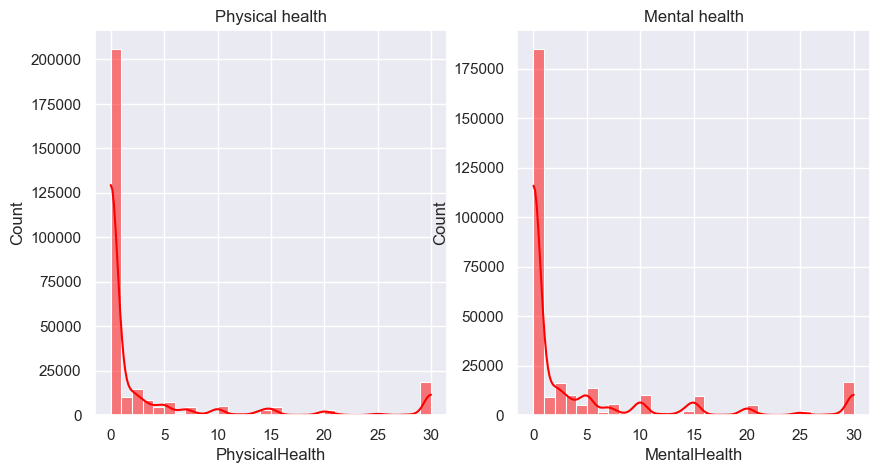

In [241]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes = axes.flatten()

# Generate histograms 
sns.histplot(df["PhysicalHealth"], bins =30, ax=axes[0] , kde=True, color = "Red")
axes[0].set_title("Physical health")
sns.histplot(df["MentalHealth"], ax=axes[1], bins =30, kde=True, color = "Red")
axes[1].set_title("Mental health")

#### - We will drop PhysicalHealth & MentalHealth columns because they have unrealistic distribution so it will be misleading 

In [242]:
df.drop(columns={"PhysicalHealth","MentalHealth"}, inplace=True)

### Maping

In [243]:
df_preproccesed = df.copy()

#### - Map column AgeCategory

In [244]:
df_preproccesed["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [245]:
# Define an ordered mapping
age_mapping = {
    '18-24': 1, '25-29': 2, '30-34': 3, '35-39': 4, '40-44': 5, 
    '45-49': 6, '50-54': 7, '55-59': 8, '60-64': 9, '65-69': 10,
    '70-74': 11, '75-79': 12, '80 or older': 13
}

# Apply mapping
df_preproccesed['AgeCategory'] = df_preproccesed['AgeCategory'].map(age_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


#### - Map column GenHealth

In [246]:
df_preproccesed["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Excellent', 'Poor'], dtype=object)

In [247]:
# Define an ordered mapping
GenHealth_mapping = {
    'Poor': 1,
    'Fair': 2,
    'Good': 3,
    'Very good': 4,
    'Excellent': 5
}

# Apply mapping
df_preproccesed['GenHealth'] = df_preproccesed['GenHealth'].map(GenHealth_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


#### - Map column Sex

In [248]:
df_preproccesed["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [249]:
# Define an ordered mapping
Sex_mapping = {
    'Female': 0,
    'Male': 1,
}

# Apply mapping
df_preproccesed['Sex'] = df_preproccesed['Sex'].map(Sex_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


#### - Map column Race

In [250]:
df_preproccesed["Race"].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [251]:
# Apply one-hot encoding
df_preproccesed = pd.get_dummies(df_preproccesed, columns=['Race'], drop_first=True) # Set `drop_first=True' to remove one column for multicollinearity
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


#### - Map Binary columns

#### - Diabetic 

In [252]:
df["Diabetic"].value_counts()

No                         248197
Yes                         39328
No, borderline diabetes      6650
Yes (during pregnancy)       2530
Name: Diabetic, dtype: int64

In [253]:
# Define an ordered mapping
binary_mapping = {
    'Yes': 1,
    'No': 0,
    'No, borderline diabetes': 0.5,
    'Yes (during pregnancy)': 1
}

# Apply mapping
binary_df = df_preproccesed.select_dtypes(include=['object'])

for col in binary_df.columns:
    df_preproccesed[col] = df_preproccesed[col].map(binary_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


## EDA

### - Let's standardize our numerical values to get meaningful results

In [254]:
numerical_cols = (df_preproccesed.select_dtypes(include=['number'])).columns
df_preproccesed_std = (df_preproccesed[numerical_cols] - df_preproccesed[numerical_cols].min()) / (df_preproccesed[numerical_cols].max() - df_preproccesed[numerical_cols].min())
df_preproccesed_std.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0.0,0.095516,1.0,0.0,0.0,0.0,0.0,0.583333,1.0,1.0,0.75,0.250,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.173514,0.0,0.0,1.0,0.0,0.0,1.000000,0.0,1.0,0.75,0.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.303650,1.0,0.0,0.0,0.0,1.0,0.750000,1.0,1.0,0.25,0.625,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.254223,0.0,0.0,0.0,0.0,0.0,0.916667,0.0,0.0,0.50,0.375,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.243796,0.0,0.0,0.0,1.0,0.0,0.333333,0.0,1.0,0.75,0.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### - 📊 Explore correlations

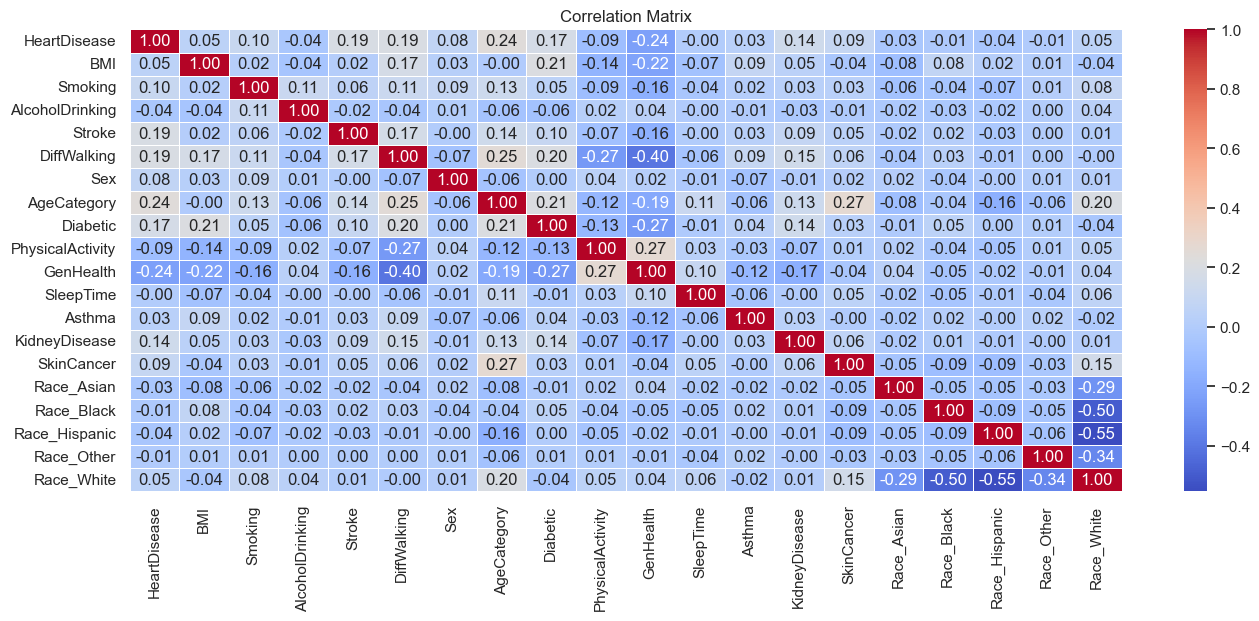

In [255]:
# Compute correlation matrix
corr_matrix = df_preproccesed_std.corr()

# Plot heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show plot
plt.title("Correlation Matrix")
plt.show()

### 📊 BMI distribution

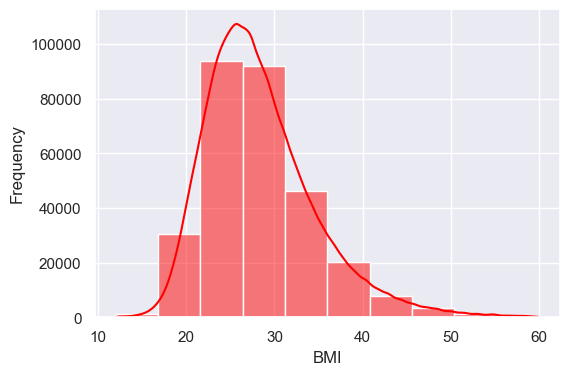

In [256]:
plt.figure(figsize=(6, 4))
sns.histplot(df["BMI"], bins = 10, kde=True ,  color = "Red")
# Labels and title
plt.xlabel("BMI")
plt.ylabel("Frequency")
# Show plot
plt.show()

### 📊 Sex VS Heart disease

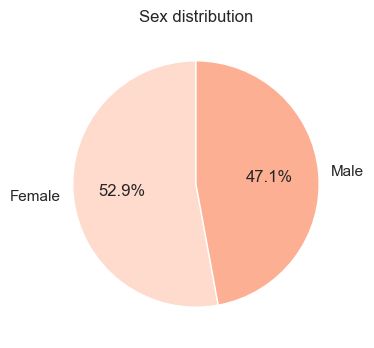

In [257]:
# Sex Distribution
Sex_distribution = df["Sex"].value_counts()
plt.figure(figsize=(4 , 4))
plt.pie(Sex_distribution.values , labels = Sex_distribution.index , autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Sex distribution")
plt.show()

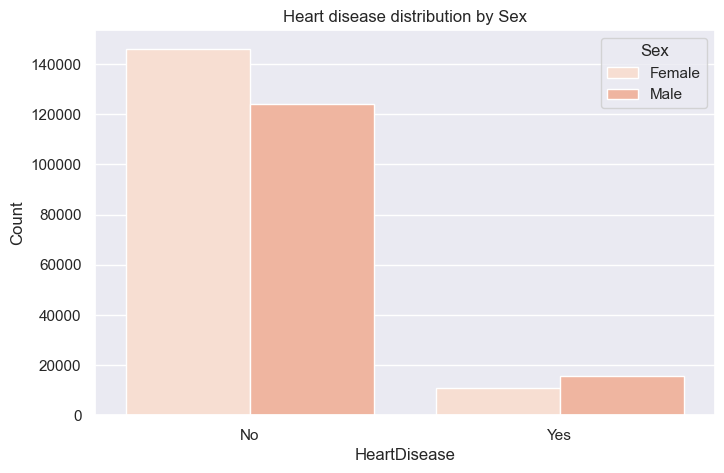

In [258]:
# Sex VS HeartDisease
Sex_counts = df.groupby(["HeartDisease", "Sex"]).size().reset_index(name="Count")

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="Sex", data=Sex_counts, palette=colors)

# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by Sex")
plt.legend(title="Sex")

# Show plot
plt.show()

#### 📝 Insight : Males have more propability to have heart disease

### 📊 Smoking VS Heart disease

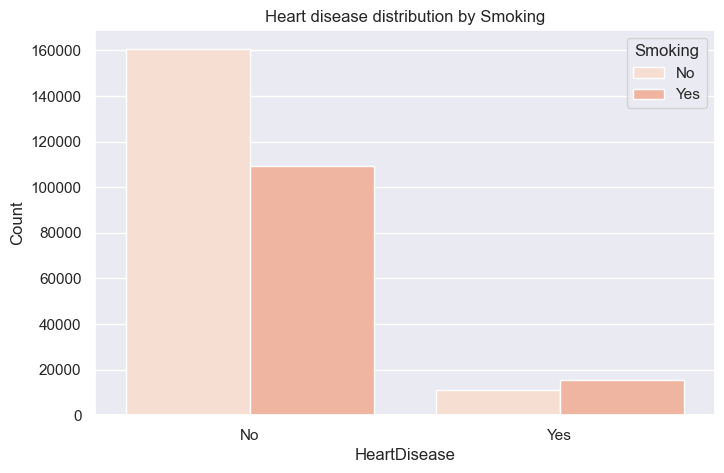

In [259]:
smoking_counts = df.groupby(["HeartDisease", "Smoking"]).size().reset_index(name="Count")

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="Smoking", data=smoking_counts, palette=colors)

# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by Smoking")
plt.legend(title="Smoking")

# Show plot
plt.show()

#### 📝 Insight : Smokers have more propability to have heart disease

### 📊 Alcohol drinking VS Heart disease

  HeartDisease AlcoholDrinking   Count
0           No              No  250081
1           No             Yes   20186
2          Yes              No   25345
3          Yes             Yes    1093


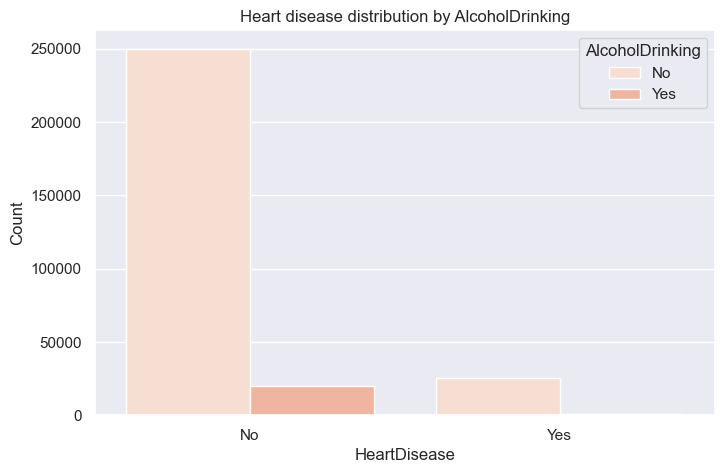

In [260]:
AlcoholDrinking_counts = df.groupby(["HeartDisease", "AlcoholDrinking"]).size().reset_index(name="Count")
print(AlcoholDrinking_counts)
# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="AlcoholDrinking", data=AlcoholDrinking_counts, palette=colors)

# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by AlcoholDrinking")
plt.legend(title="AlcoholDrinking")

# Show plot
plt.show()

#### 📝 Insight : Alcohol hasn't significant impact on having heart disease

### 📊 Stroke VS Heart disease

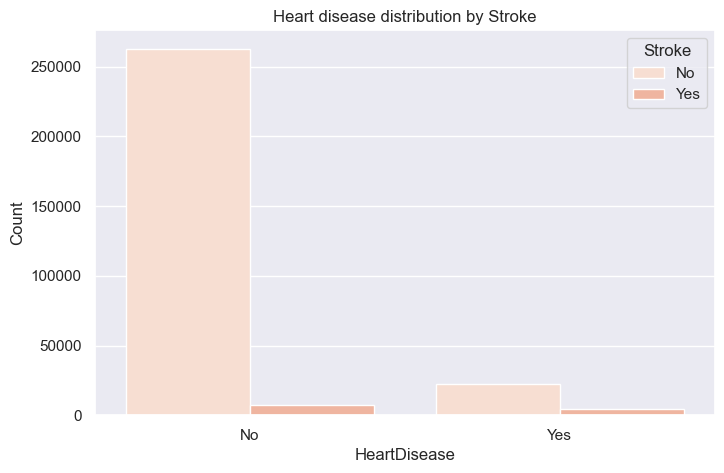

In [261]:
Stroke_counts = df.groupby(["HeartDisease", "Stroke"]).size().reset_index(name="Count")

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="Stroke", data=Stroke_counts, palette=colors)

# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by Stroke")
plt.legend(title="Stroke")

# Show plot
plt.show()

#### 📝 Insight : Strokes hasn't significant impact on having heart disease

### 📊 Age category VS Heart disease

In [262]:
# Define an ordered mapping
age_mapping = {
    '18-24': 'Young-Adult', '25-29': 'Young-Adult', '30-34': 'Young-Adult', '35-39': 'Young-Adult',
    '40-44': 'Middle-Adult', '45-49': 'Middle-Adult', '50-54': 'Middle-Adult',
    '55-59': 'Middle-Adult', '60-64': 'Middle-Adult', '65-69': 'Young-Old',
    '70-74': 'Young-Old', '75-79': 'Middle-Old', '80 or older': 'Middle-Old'
}

# Apply mapping
df['AgeCategory'] = df['AgeCategory'].map(age_mapping)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,No,Female,Middle-Adult,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,No,Female,Middle-Old,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,No,Male,Young-Old,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,No,Female,Middle-Old,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,Yes,Female,Middle-Adult,White,No,Yes,Very good,8,No,No,No


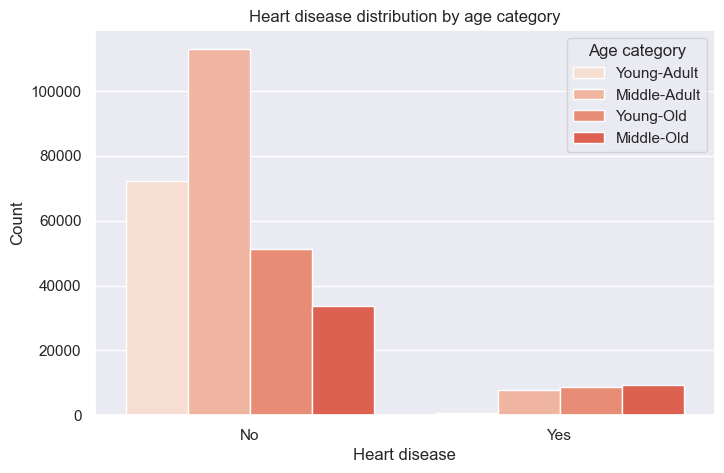

In [263]:
AgeCategory_counts = df.groupby(["HeartDisease", "AgeCategory"]).size().reset_index(name="Count")

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))

age_colors = {
    "Young-Adult": colors[0],  
    "Middle-Adult": colors[1],  
    "Young-Old": colors[2],  
    "Middle-Old": colors[3]  
}
# Define the order of AgeCategory as per the colors dictionary
hue_order = ["Young-Adult", "Middle-Adult", "Young-Old", "Middle-Old"]

# Create the bar plot with sorted hues
sns.barplot(x="HeartDisease", y="Count", hue="AgeCategory", 
            data=AgeCategory_counts, palette=age_colors, hue_order=hue_order)

# Labels and formatting
plt.xlabel("Heart disease")
plt.ylabel("Count")
plt.title("Heart disease distribution by age category")
plt.legend(title="Age category")

# Show plot
plt.show()

#### 📝 Insight : Older peaple have more propabiblity to have Heart disease

### 📊 Diabetic VS Heart disease

In [264]:
df["Diabetic"].value_counts()


No                         248197
Yes                         39328
No, borderline diabetes      6650
Yes (during pregnancy)       2530
Name: Diabetic, dtype: int64

#### - Keep olny Yes and No because the remaining have low num of records


In [265]:
df = df[(df["Diabetic"] == "Yes") | (df["Diabetic"] == "No")]

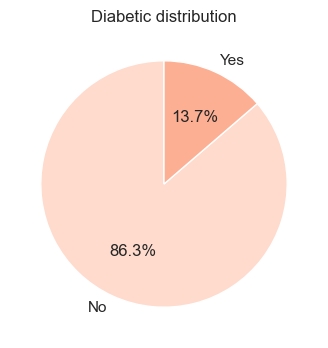

In [266]:
# Sex Distribution
Diabetic_distribution = df["Diabetic"].value_counts()
plt.figure(figsize=(4 , 4))
plt.pie(Diabetic_distribution.values , labels = Diabetic_distribution.index , autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Diabetic distribution")
plt.show()

#### - Most of our data aran't Diabetic peaple

  HeartDisease Diabetic   Count
0           No       No  231222
1           No      Yes   30738
2          Yes       No   16975
3          Yes      Yes    8590


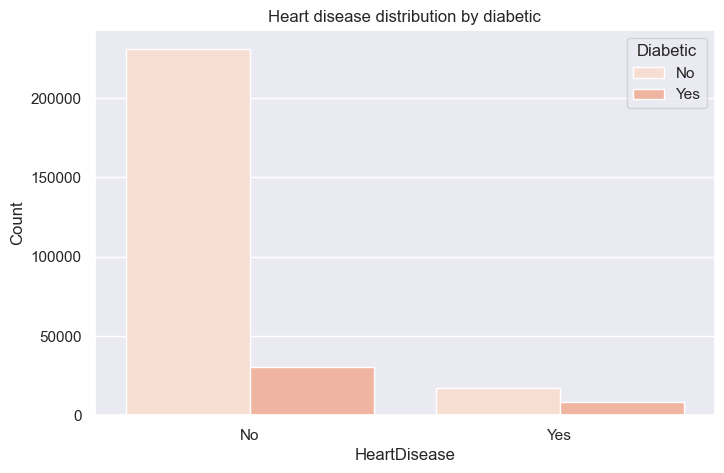

In [267]:
Diabetic_counts = pd.DataFrame(df.groupby(["HeartDisease", "Diabetic"]).size().reset_index(name="Count"))
print(Diabetic_counts)
# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="Diabetic", data=Diabetic_counts, palette=colors)

# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by diabetic")
plt.legend(title="Diabetic")

# Show plot
plt.show()

#### 📝 Insight : Diabetes hasn't significant impact on having heart disease

### 📊 Stroke VS Heart disease

In [268]:
df['GenHealth'].value_counts()

Very good    100849
Good          86527
Excellent     57907
Fair          32144
Poor          10098
Name: GenHealth, dtype: int64

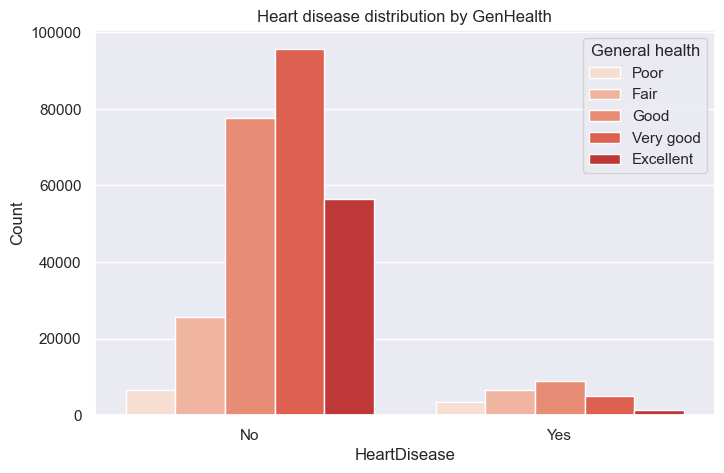

In [269]:
GenHealth_counts = df.groupby(["HeartDisease", "GenHealth"]).size().reset_index(name="Count")

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))

GenHealth_colors = {
    "Poor": colors[0],  
    "Fair": colors[1],  
    "Good": colors[2],  
    "Very good": colors[3],
    "Excellent": colors[4]
}
# Define the order of AgeCategory as per the colors dictionary
hue_order = list(GenHealth_colors.keys())

# Create the bar plot with sorted hues
sns.barplot(x="HeartDisease", y="Count", hue="GenHealth", 
            data=GenHealth_counts, palette=GenHealth_colors, hue_order=hue_order)

# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by GenHealth")
plt.legend(title="General health")

# Show plot
plt.show()

#### 📝 Insight : The lower General health the higher propability to have heart disease

### 📊 Asthma VS Heart disease

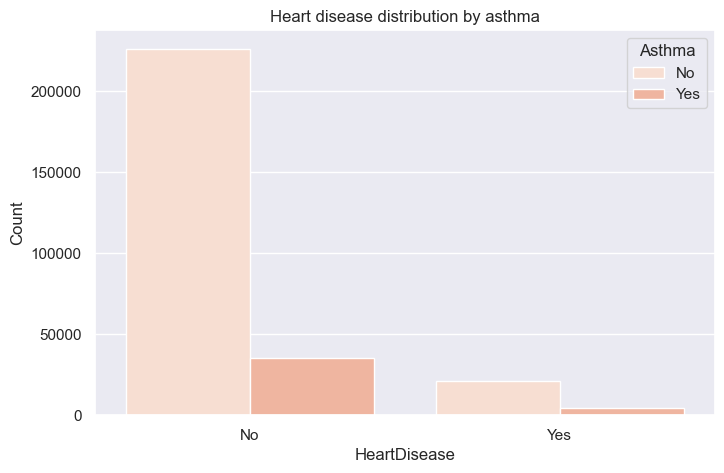

In [270]:
Asthma_counts = df.groupby(["HeartDisease", "Asthma"]).size().reset_index(name="Count")

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="Asthma", data=Asthma_counts, palette=colors)

# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by asthma")
plt.legend(title="Asthma")

# Show plot
plt.show()

#### 📝 Insight : Asthma hasn't significant impact on having heart disease

### 📊 Kidney disease VS Heart disease

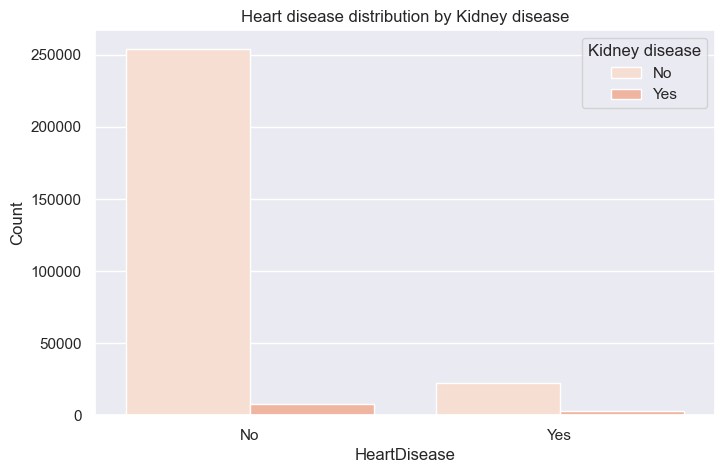

In [271]:
KidneyDisease_counts = df.groupby(["HeartDisease", "KidneyDisease"]).size().reset_index(name="Count")

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="KidneyDisease", data=KidneyDisease_counts, palette=colors)

# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by Kidney disease")
plt.legend(title="Kidney disease")

# Show plot
plt.show()

#### 📝 Insight : Kidney disease hasn't significant impact on having heart disease

### 📊 Skin cancer VS Heart disease

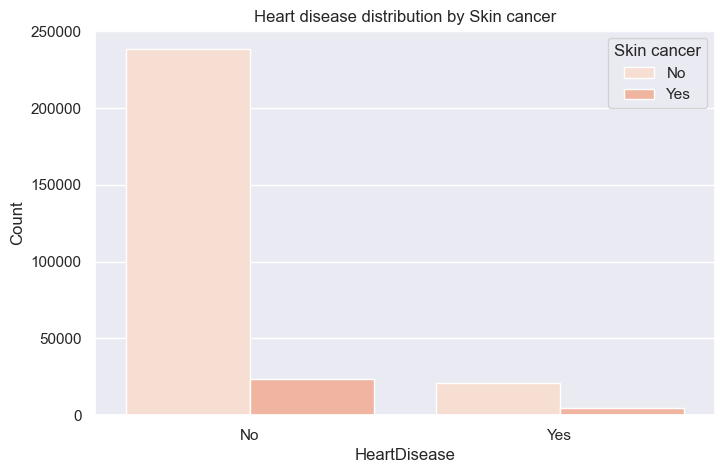

In [272]:
SkinCancer_counts = df.groupby(["HeartDisease", "SkinCancer"]).size().reset_index(name="Count")

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x="HeartDisease", y="Count", hue="SkinCancer", data=SkinCancer_counts, palette=colors)

# Labels and formatting
plt.xlabel("HeartDisease")
plt.ylabel("Count")
plt.title("Heart disease distribution by Skin cancer")
plt.legend(title="Skin cancer")

# Show plot
plt.show()

#### 📝 Insight : Skin cancer hasn't significant impact on having heart disease

### 📊 Sleep quality VS Heart disease

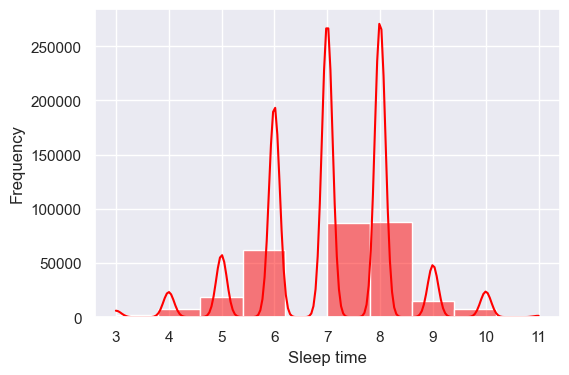

In [273]:
plt.figure(figsize=(6, 4))
sns.histplot(df["SleepTime"], bins = 10, kde=True ,  color = "Red")
# Labels and title
plt.xlabel("Sleep time")
plt.ylabel("Frequency")
# Show plot
plt.show()

In [274]:
df['SleepTime_cat'] = pd.cut(df['SleepTime'],
                                bins=[0, 4, 6, 9, df['SleepTime'].max()],
                                labels=['Severely Sleep', 'Short Sleep', 'Normal Sleep', 'Long Sleep'])

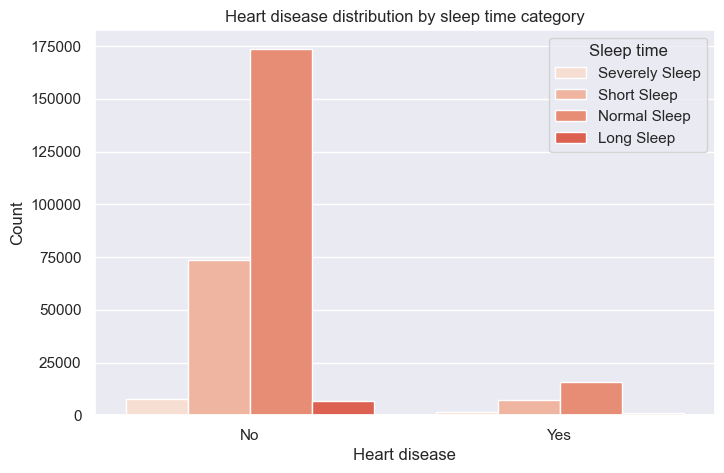

In [275]:
SleepTime_cat_counts = df.groupby(["HeartDisease", "SleepTime_cat"]).size().reset_index(name="Count")

# Plot grouped bar chart using seaborn
plt.figure(figsize=(8, 5))

SleepTime_cat_colors = {
    "Severely Sleep": colors[0],  
    "Short Sleep": colors[1],  
    "Normal Sleep": colors[2],  
    "Long Sleep": colors[3]  
}
# Define the order of AgeCategory as per the colors dictionary
hue_order = list(SleepTime_cat_colors.keys())

# Create the bar plot with sorted hues
sns.barplot(x="HeartDisease", y="Count", hue="SleepTime_cat", 
            data=SleepTime_cat_counts, palette=SleepTime_cat_colors, hue_order=hue_order)

# Labels and formatting
plt.xlabel("Heart disease")
plt.ylabel("Count")
plt.title("Heart disease distribution by sleep time category")
plt.legend(title="Sleep time")

# Show plot
plt.show()

#### 📝 Insight : Peaple with good sleep quality have more propabiblity to haven't heart disease